In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# load the ex2data2.txt data from the data folder
# the 1rst column is the test1 score, the 2nd column is the test2 score and the 3rd column is the result: 1 = accepted and 0 = not accepted 
chip = np.loadtxt('ex2data2.txt', delimiter=',')
chip


array([[ 0.051267 ,  0.69956  ,  1.       ],
       [-0.092742 ,  0.68494  ,  1.       ],
       [-0.21371  ,  0.69225  ,  1.       ],
       [-0.375    ,  0.50219  ,  1.       ],
       [-0.51325  ,  0.46564  ,  1.       ],
       [-0.52477  ,  0.2098   ,  1.       ],
       [-0.39804  ,  0.034357 ,  1.       ],
       [-0.30588  , -0.19225  ,  1.       ],
       [ 0.016705 , -0.40424  ,  1.       ],
       [ 0.13191  , -0.51389  ,  1.       ],
       [ 0.38537  , -0.56506  ,  1.       ],
       [ 0.52938  , -0.5212   ,  1.       ],
       [ 0.63882  , -0.24342  ,  1.       ],
       [ 0.73675  , -0.18494  ,  1.       ],
       [ 0.54666  ,  0.48757  ,  1.       ],
       [ 0.322    ,  0.5826   ,  1.       ],
       [ 0.16647  ,  0.53874  ,  1.       ],
       [-0.046659 ,  0.81652  ,  1.       ],
       [-0.17339  ,  0.69956  ,  1.       ],
       [-0.47869  ,  0.63377  ,  1.       ],
       [-0.60541  ,  0.59722  ,  1.       ],
       [-0.62846  ,  0.33406  ,  1.       ],
       [-0

In [9]:
X = chip[:, 0:2]
y = chip[:, 2].reshape(-1, 1)

X[:5], y[:5]

(array([[ 0.051267,  0.69956 ],
        [-0.092742,  0.68494 ],
        [-0.21371 ,  0.69225 ],
        [-0.375   ,  0.50219 ],
        [-0.51325 ,  0.46564 ]]),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]))

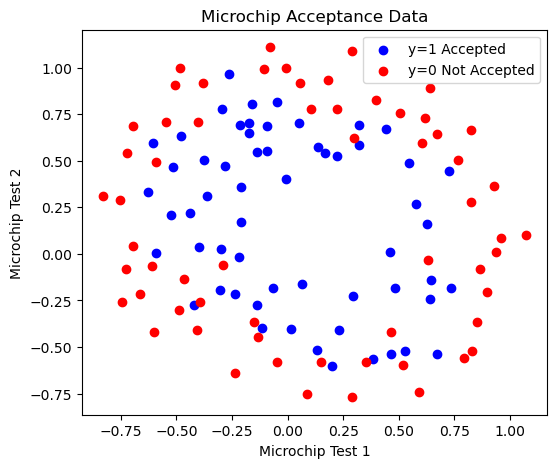

In [10]:
# Separate positive and negative examples
pos = y.flatten() == 1
neg = y.flatten() == 0

# Plot data
plt.figure(figsize=(6,5))
plt.scatter(X[pos, 0], X[pos, 1], c='b', label='y=1 Accepted')
plt.scatter(X[neg, 0], X[neg, 1], c='r', label='y=0 Not Accepted')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend()
plt.title('Microchip Acceptance Data')
plt.show()

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_gradient(z):
    return sigmoid(z) * (1 - sigmoid(z))


In [12]:
# Layer sizes
input_size = 2
hidden_size = 5
output_size = 1

# Random initialization
np.random.seed(1)
theta1 = np.random.randn(hidden_size, input_size + 1) * 0.1
theta2 = np.random.randn(output_size, hidden_size + 1) * 0.1

# Add bias term to X
m = X.shape[0]
X_bias = np.c_[np.ones((m, 1)), X]


In [13]:
alpha = 0.8        # learning rate
epochs = 300000    # number of iterations
costs = []

for i in range(epochs):
    # Forward propagation
    z2 = X_bias @ theta1.T
    a2 = sigmoid(z2)
    a2_bias = np.c_[np.ones((m, 1)), a2]
    z3 = a2_bias @ theta2.T
    a3 = sigmoid(z3)
    
    # Cost (binary cross-entropy)
    cost = -(1/m) * np.sum(y*np.log(a3) + (1-y)*np.log(1-a3))
    costs.append(cost)
    
    # Backpropagation
    delta3 = a3 - y
    delta2 = (delta3 @ theta2)[:, 1:] * sigmoid_gradient(z2)
    
    theta2_grad = (delta3.T @ a2_bias) / m
    theta1_grad = (delta2.T @ X_bias) / m
    
    # Gradient descent update
    theta1 -= alpha * theta1_grad
    theta2 -= alpha * theta2_grad
    
    if i % 50000 == 0:
        print(f"Iteration {i} | Cost: {cost:.4f}")

print("Training complete!")


Iteration 0 | Cost: 0.6958
Iteration 50000 | Cost: 0.2844
Iteration 100000 | Cost: 0.2805
Iteration 150000 | Cost: 0.2788
Iteration 200000 | Cost: 0.2775
Iteration 250000 | Cost: 0.2764
Training complete!


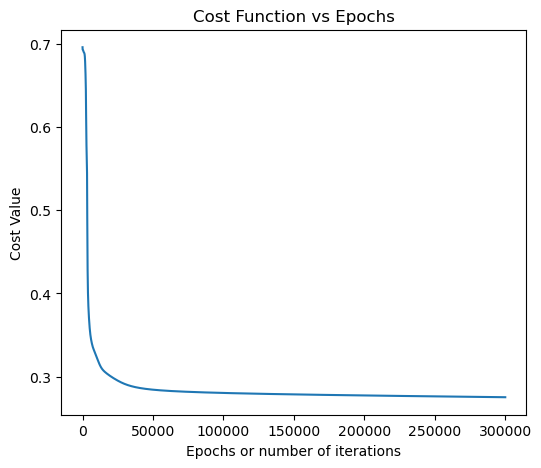

In [14]:
plt.figure(figsize=(6,5))
plt.plot(costs)
plt.xlabel('Epochs or number of iterations')
plt.ylabel('Cost Value')
plt.title('Cost Function vs Epochs')
plt.show()


C:\Users\fofab\AppData\Local\Temp\ipykernel_70592\3187441408.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = sigmoid(z3)


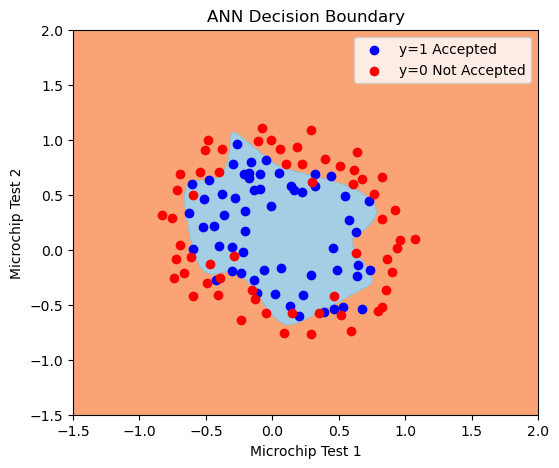

In [15]:
u = np.linspace(-1.5, 2.0, 200)
v = np.linspace(-1.5, 2.0, 200)
z = np.zeros((len(u), len(v)))

for i in range(len(u)):
    for j in range(len(v)):
        x_val = np.array([[1, u[i], v[j]]])
        a2 = sigmoid(x_val @ theta1.T)
        a2_bias = np.c_[np.ones((1, 1)), a2]
        z3 = a2_bias @ theta2.T
        z[i, j] = sigmoid(z3)

z = z.T

plt.figure(figsize=(6,5))
plt.contourf(u, v, z, levels=[0, 0.5, 1], cmap='RdYlBu', alpha=0.8)
plt.scatter(X[pos, 0], X[pos, 1], c='b', label='y=1 Accepted')
plt.scatter(X[neg, 0], X[neg, 1], c='r', label='y=0 Not Accepted')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend()
plt.title('ANN Decision Boundary')
plt.show()


# Do the following plot
![title](chip_scatter_plot.png)

# Using the artificial neural network we built in class, run the train function on the chip data and plot the cost function below
![title](chip_cost_function.png)

# plot the decision boundary below
![title](chip_decision_boundary.png)